# Libraries

In [1]:
import os
import pathlib
import zipfile
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories

In [2]:
#Define dataset directory, train directory and test directory
dataset_dir = "forestsplt"
train_dir = "result"
test_dir = "forestsplt/Test"

# Dataset Sample

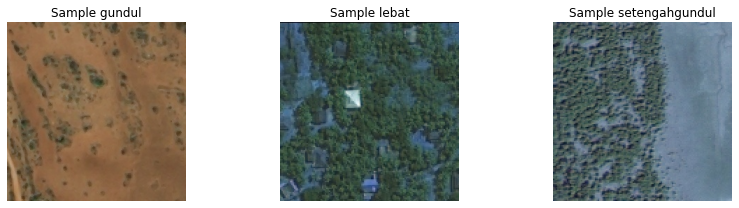

In [3]:
#Show dataset sample from train dataset
#Initiate all directory in train folder
label_dirs = os.listdir(train_dir)

#initiate the figure and the axis to show the sample data images
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

#Loop through all label directories and show 1 image for each label
for i, label_dir in enumerate(label_dirs):
    label_dir_path = os.path.join(train_dir, label_dir)
    image_files = os.listdir(label_dir_path)
    image_path = os.path.join(label_dir_path, image_files[0])
    image = Image.open(image_path)
    axs[i].imshow(image)
    axs[i].set_title(f'Sample {os.listdir(train_dir)[i]}')
    axs[i].axis('off')

# Show figure
plt.tight_layout()
plt.show()

# ImageDataGenerator

In [4]:
def image_generator(train_dir, test_dir):
  #Initiate the ImageDataGenerator class for training dataset
  #Define the augmentation value
  train_datagen = ImageDataGenerator()

  # Specify the method to load images from a directory and pass in the appropriate arguments:
  # - directory: should be a relative path to the directory containing the data
  # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
  # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
  # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
  #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      target_size=(256, 256),
                                                      batch_size=16,
                                                      class_mode="categorical")

  #Initiate the ImageDataGenerator class fro testing dataset
  #Define the augmentation value
  test_datagen = ImageDataGenerator()

  # Pass in the appropriate arguments to the flow_from_directory method
  test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(256, 256))

  return train_generator, test_generator

In [5]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 3878 images belonging to 3 classes.
Found 112 images belonging to 3 classes.


# Model

In [6]:
def create_uncompiled_model():
    inputs = layers.Input(shape=(256, 256, 3))

    # x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    # Flatten the output layer to 1 dimension
    x = layers.Flatten()(inputs)
    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = layers.Dense(128, activation='relu')(x)
    # Add a dropout rate of 0.2
    x = layers.Dropout(0.2)(x)
    # Add a final sigmoid layer for classification
    x = layers.Dense(4, activation='softmax')(x)
    # Create the complete model by using the Model class
    model = Model(inputs=inputs, outputs=x)

    return model

In [7]:
uncompiled_model = create_uncompiled_model()

try:
  uncompiled_model.predict(train_generator)
except:
  print("Your current architecture is incompatible with the windowed dataset, try adjusting it!")
else:
  print("Your current architecture is compatible with the windowed dataset!")

243/243 [==============================] - 174s 712ms/step
Your current architecture is compatible with the windowed dataset!


In [8]:
def create_model():
  optimizer = tf.keras.optimizers.Adam()
  inputs = layers.Input(shape=(256, 256, 3))


  x = layers.Flatten()(inputs)
  # Add a fully connected layer with 128 hidden units and ReLU activation
  x = layers.Dense(128, activation='relu')(x)
  # Add a dropout rate
  x = layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = x = layers.Dense(3, activation='softmax')(x)
  # Create the complete model by using the Model class
  model = Model(inputs=inputs, outputs=x)
  # Compile the model
  model.compile(optimizer = optimizer,
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  return model

In [9]:
myModel = create_model()

In [10]:
# Inspect parameters
total_params = myModel.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in myModel.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 25,166,339 total parameters in this model.
There are 25,166,339 trainable parameters in this model.


# Training

In [11]:
history = myModel.fit(train_generator,
                    validation_data = test_generator,
                    epochs = 50,
                    callbacks=None,
                    verbose = 2)

Epoch 1/50
243/243 - 175s - loss: 1491.5352 - accuracy: 0.3726 - val_loss: 1.0969 - val_accuracy: 0.3750 - 175s/epoch - 719ms/step
Epoch 2/50
243/243 - 163s - loss: 1.2745 - accuracy: 0.3791 - val_loss: 1.0953 - val_accuracy: 0.3750 - 163s/epoch - 673ms/step
Epoch 3/50
243/243 - 162s - loss: 1.1144 - accuracy: 0.3806 - val_loss: 1.0947 - val_accuracy: 0.3750 - 162s/epoch - 668ms/step
Epoch 4/50
243/243 - 162s - loss: 1.0899 - accuracy: 0.3806 - val_loss: 1.0946 - val_accuracy: 0.3750 - 162s/epoch - 667ms/step
Epoch 5/50
243/243 - 82s - loss: 1.0886 - accuracy: 0.3822 - val_loss: 1.0945 - val_accuracy: 0.3750 - 82s/epoch - 337ms/step
Epoch 6/50
243/243 - 20389s - loss: 1.0891 - accuracy: 0.3827 - val_loss: 1.0945 - val_accuracy: 0.3750 - 20389s/epoch - 84s/step
Epoch 7/50
243/243 - 76s - loss: 1.0890 - accuracy: 0.3814 - val_loss: 1.0945 - val_accuracy: 0.3750 - 76s/epoch - 314ms/step
Epoch 8/50
243/243 - 76s - loss: 1.0874 - accuracy: 0.3829 - val_loss: 1.0945 - val_accuracy: 0.3750 - 

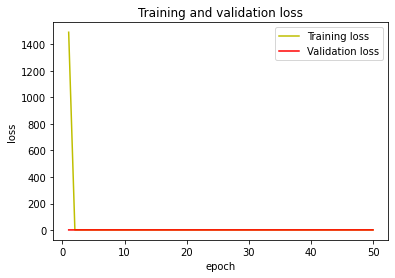

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

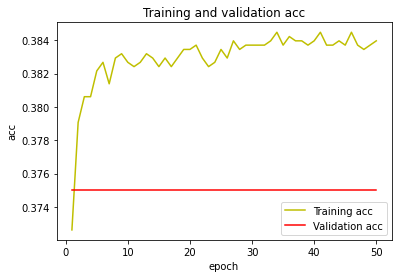

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()